In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [3]:
kidney_data = pd.read_csv('data/kidney_disease.csv')
kidney_data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Removing/Dropping ID column
kidney_data.drop('id', axis = 1, inplace = True)
kidney_data.shape

(400, 25)

In [5]:
# Rename the column names to make it more clear and User-friendly
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'classification']

In [6]:
# Making sure the changes (column names) made 
kidney_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Statistical description of the data
kidney_data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
# Identify the data type for each feature/ column 
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
# Changing the datatype from object type to numerical data
kidney_data['packed_cell_volume'] = pd.to_numeric(kidney_data['packed_cell_volume'], errors='coerce')
kidney_data['white_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], errors='coerce')
kidney_data['red_blood_cell_count'] = pd.to_numeric(kidney_data['red_blood_cell_count'], errors='coerce')

In [10]:
# Extractiong categorical data
object_dtypes = kidney_data.select_dtypes(include = 'object')
object_dtypes.head()


,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [11]:
# Extractiong Numerical data
Numerical_dtypes = kidney_data.select_dtypes(include = 'float64')
Numerical_dtypes.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


Total missing values on the dataset

In [12]:
kidney_data.isnull().sum().sum()

1012

Missing values on Numerical Values

In [13]:
Numerical_dtypes.isnull().sum().sum()

778

There are missing values almost in each column

In [14]:
object_dtypes.isnull().sum().sum()

234

No duplicated rows!

In [15]:
kidney_data.duplicated().sum()

0

Cross-checking each categorical features unique values (identifying outliers)

In [16]:
print("Categories in 'red_blood_cells' variable:     ",end=" " )
print(kidney_data['red_blood_cells'].unique())

print("Categories in 'hypertension' variable:     ",end=" " )
print(kidney_data['hypertension'].unique())

print("Categories in 'diabetes_mellitus' variable:     ",end=" " )
print(kidney_data['diabetes_mellitus'].unique())

print("Categories in 'coronary_artery_disease' variable:     ",end=" " )
print(kidney_data['coronary_artery_disease'].unique())

print("Categories in 'appetite' variable:     ",end=" " )
print(kidney_data['appetite'].unique())

print("Categories in 'peda_edema' variable:     ",end=" " )
print(kidney_data['peda_edema'].unique())

print("Categories in 'anemia' variable:     ",end=" " )
print(kidney_data['anemia'].unique())

print("Categories in 'classification' variable:     ",end=" " )
print(kidney_data['classification'].unique())

print("Categories in 'pus_cell' variable:  ",end=" ")
print(kidney_data['pus_cell'].unique())

print("Categories in'pus_cell_clumps' variable:",end=" " )
print(kidney_data['pus_cell_clumps'].unique())

print("Categories in 'bacteria' variable:     ",end=" " )
print(kidney_data['bacteria'].unique())

Categories in 'red_blood_cells' variable:      [nan 'normal' 'abnormal']
Categories in 'hypertension' variable:      ['yes' 'no' nan]
Categories in 'diabetes_mellitus' variable:      ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Categories in 'coronary_artery_disease' variable:      ['no' 'yes' '\tno' nan]
Categories in 'appetite' variable:      ['good' 'poor' nan]
Categories in 'peda_edema' variable:      ['no' 'yes' nan]
Categories in 'anemia' variable:      ['no' 'yes' nan]
Categories in 'classification' variable:      ['ckd' 'ckd\t' 'notckd']
Categories in 'pus_cell' variable:   ['normal' 'abnormal' nan]
Categories in'pus_cell_clumps' variable: ['notpresent' 'present' nan]
Categories in 'bacteria' variable:      ['notpresent' 'present' nan]


In [17]:
Numerical_dtypes.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [18]:
object_dtypes.columns

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'anemia', 'classification'],
      dtype='object')

Redefining the numerical & categorical columns

In [19]:
numeric_features = [feature for feature in kidney_data.columns if kidney_data[feature].dtype != 'O']
categorical_features = [feature for feature in kidney_data.columns if kidney_data[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

We have 11 categorical features : ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'classification']


In [20]:
kidney_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [21]:
df = kidney_data

In [22]:
# Cleaning unique values (outliners), Replace incorrect values 
df.classification=df.classification.replace("ckd\t","ckd") 
df.coronary_artery_disease=df.coronary_artery_disease.replace("\tno", "no")
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


Imputation for categorical columns (handling missing values)

In [23]:
categorical_imputer = SimpleImputer(strategy='most_frequent') 
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

- Imputation for numerical columns (handling missing values)

In [24]:
numerical_imputer = SimpleImputer(strategy='mean')
df[numeric_features] = numerical_imputer.fit_transform(df[numeric_features])

- Print the imputed dataset

In [25]:

df.isnull().sum().sum()

0

Visualization

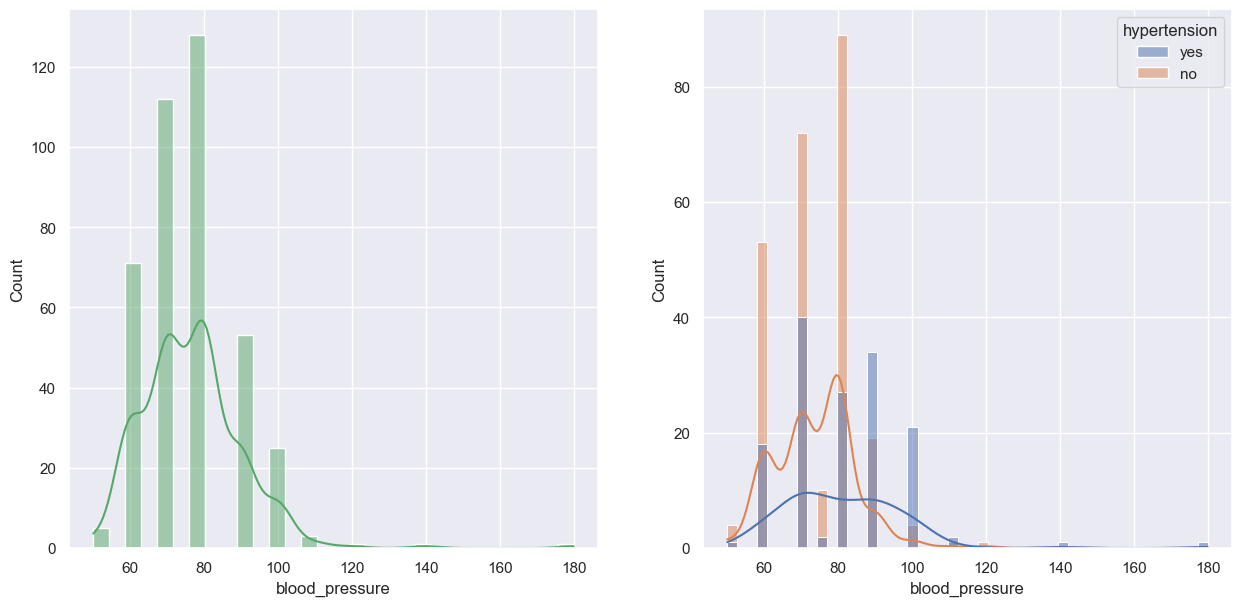

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='blood_pressure',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='blood_pressure',kde=True,hue='hypertension')
plt.show()

Hypertension is directly proportinal to blood_pressure
- Low blood pressure tends to 'No' hypertension
- High blood pressure tends to 'Yes' Hypertesion

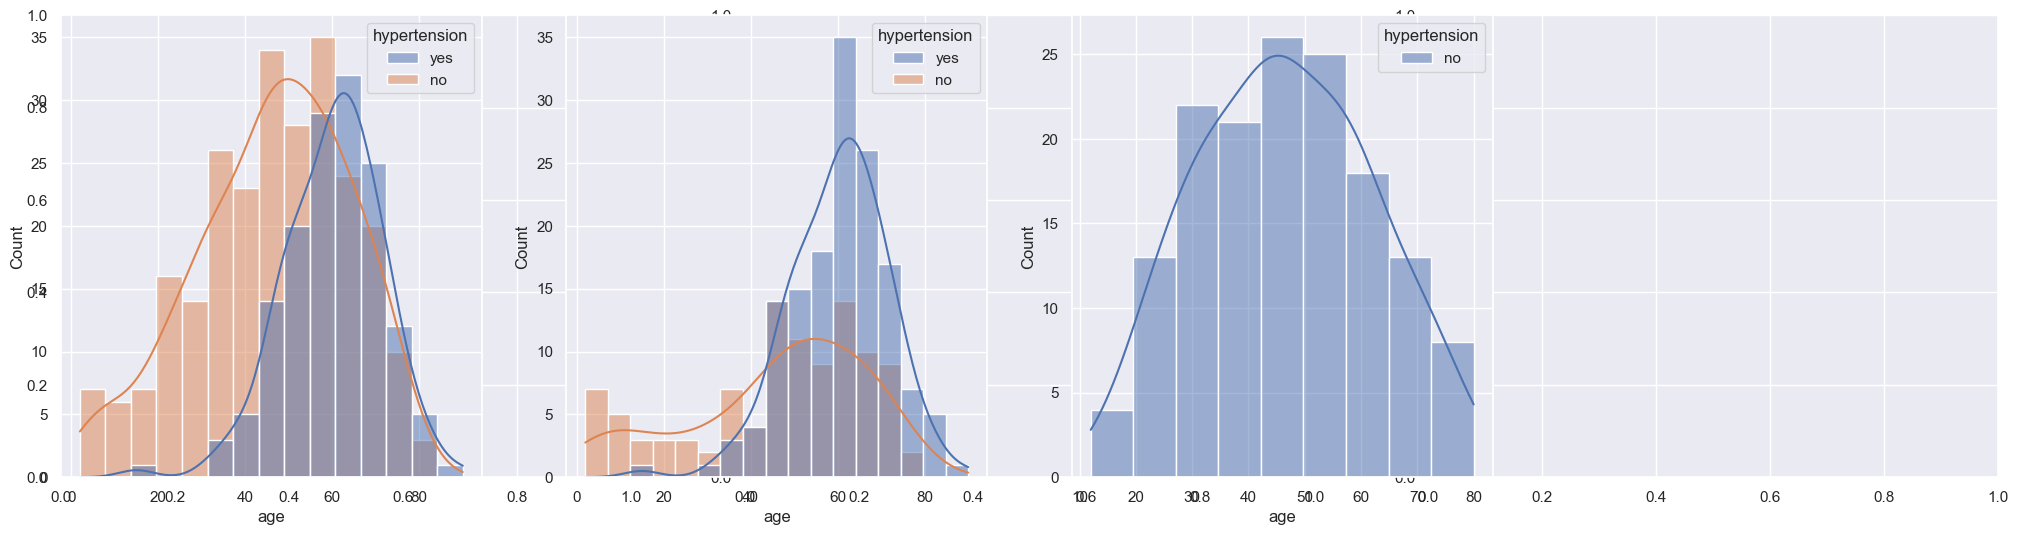

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='age',kde=True,hue='hypertension')
plt.subplot(142)
sns.histplot(data=df[df.classification=='ckd'],x='age',kde=True,hue='hypertension')
plt.subplot(143)
sns.histplot(data=df[df.classification=='notckd'],x='age',kde=True,hue='hypertension')
plt.show()

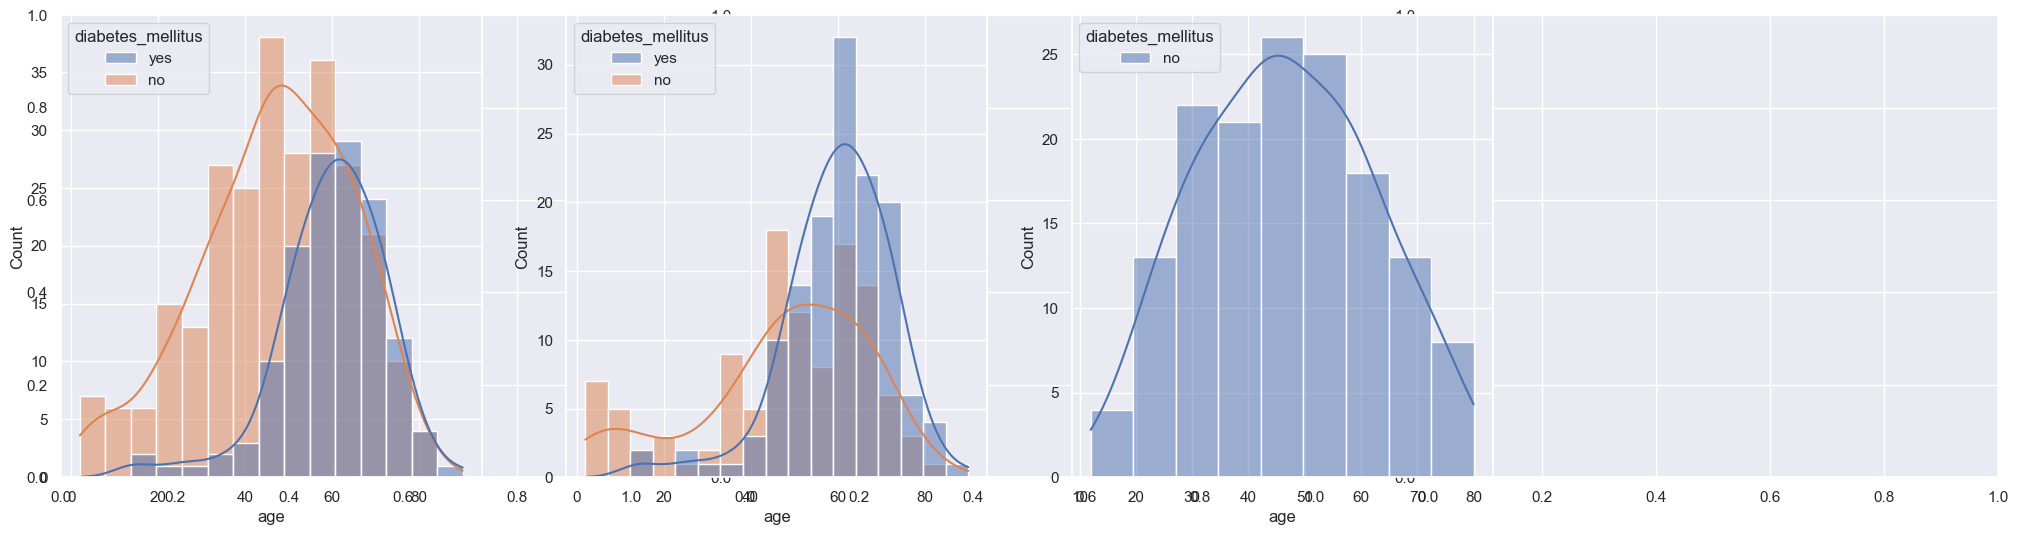

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='age',kde=True,hue='diabetes_mellitus')
plt.subplot(142)
sns.histplot(data=df[df.classification=='ckd'],x='age',kde=True,hue='diabetes_mellitus')
plt.subplot(143)
sns.histplot(data=df[df.classification=='notckd'],x='age',kde=True,hue='diabetes_mellitus')

plt.show()

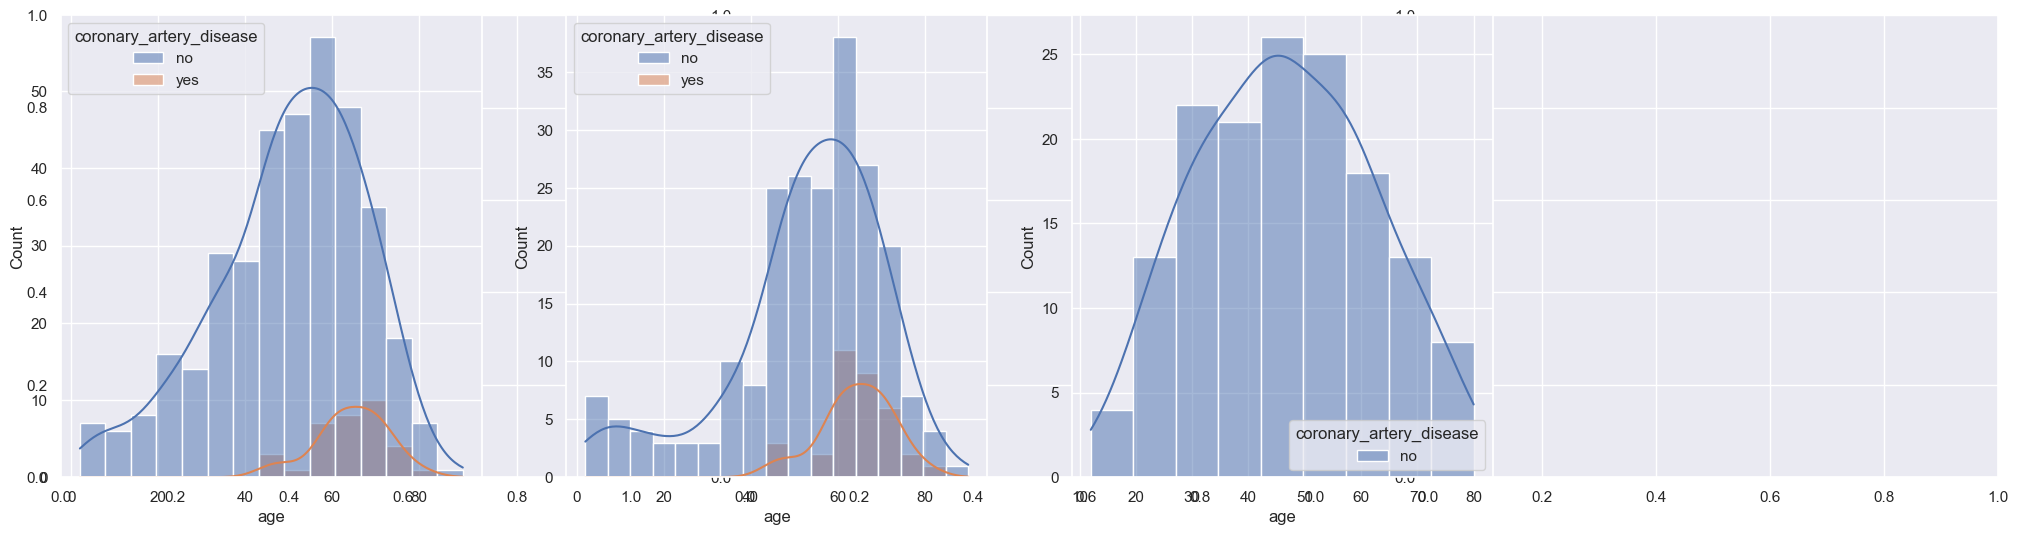

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='age',kde=True,hue='coronary_artery_disease')
plt.subplot(142)
sns.histplot(data=df[df.classification=='ckd'],x='age',kde=True,hue='coronary_artery_disease')
plt.subplot(143)
sns.histplot(data=df[df.classification=='notckd'],x='age',kde=True,hue='coronary_artery_disease')
plt.show()

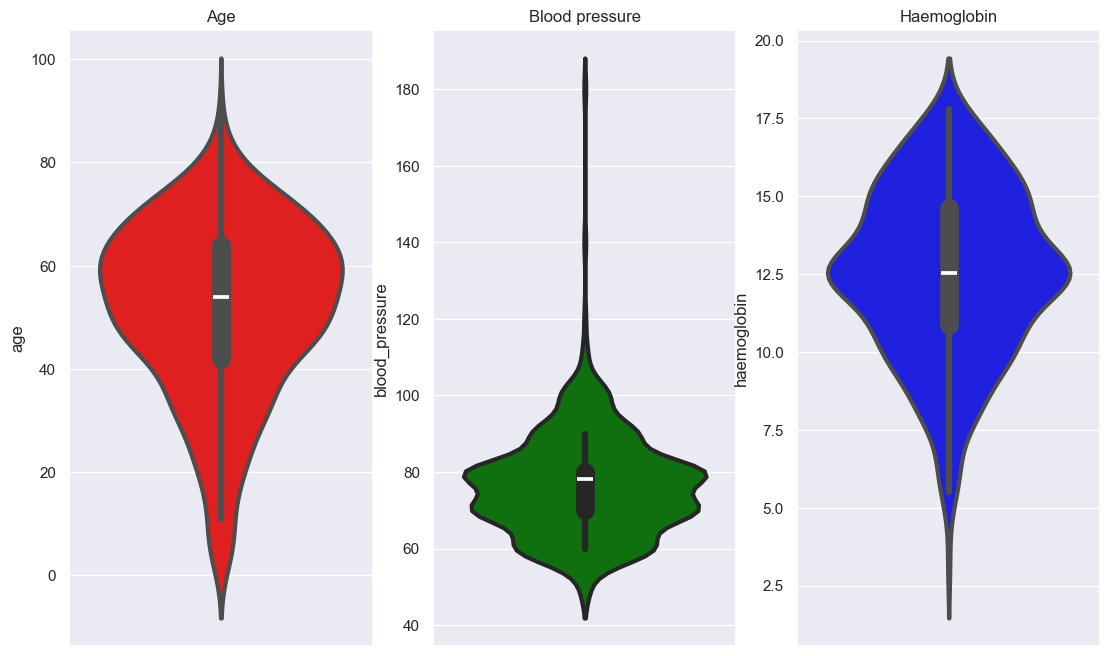

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.violinplot(y='age',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Blood pressure')
sns.violinplot(y='blood_pressure',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Haemoglobin')
sns.violinplot(y='haemoglobin',data=df,color='blue',linewidth=3)
plt.show()

As the above visualization shows there are:
- Three categorical columns with unique values. 
- These are separately visualized as:


In [33]:
print(df.classification.value_counts())
print(df.coronary_artery_disease.value_counts())
print(df.diabetes_mellitus .value_counts())


classification
ckd       250
notckd    150
Name: count, dtype: int64
coronary_artery_disease
no     366
yes     34
Name: count, dtype: int64
diabetes_mellitus
no     263
yes    137
Name: count, dtype: int64


Insights:
- Imbalanced dataset


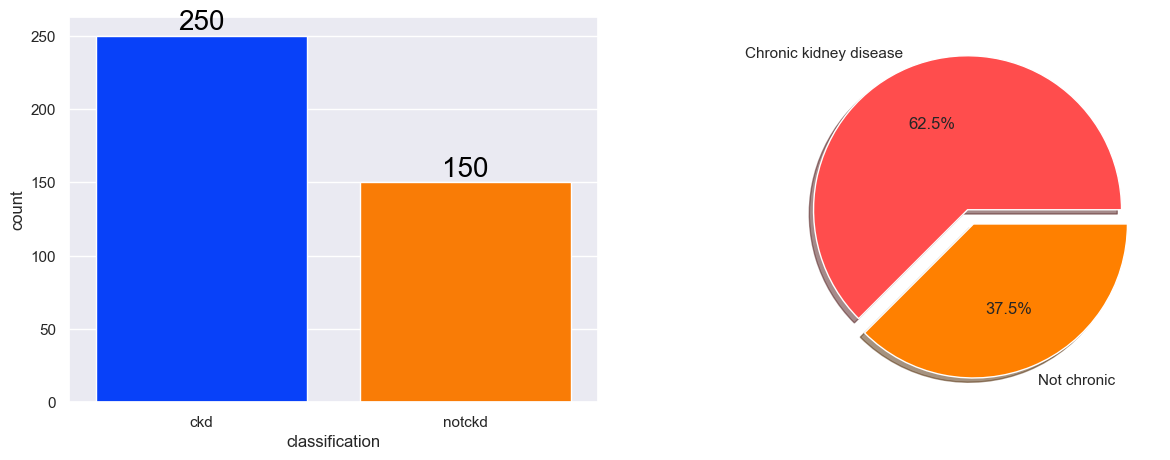

In [44]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['classification'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['classification'].value_counts(),labels=['Chronic kidney disease','Not chronic'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


In [41]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

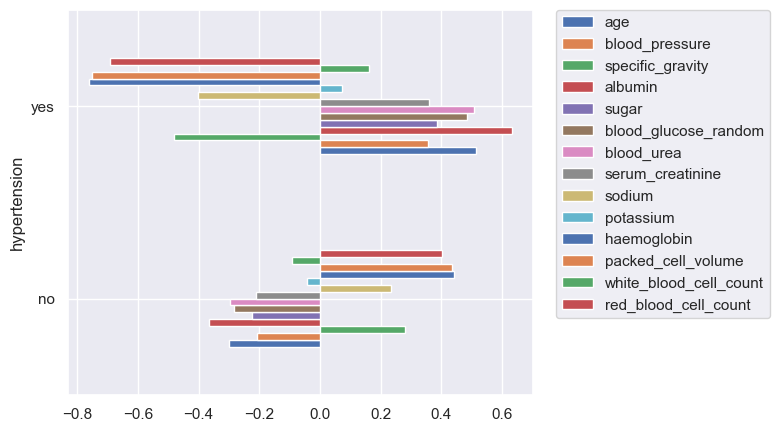

In [43]:
#df.groupby('appetite').agg(numeric_features.mean()).plot(kind='barh',figsize=(6,5))
df.groupby('hypertension')[numeric_features].mean().plot(kind='barh', figsize=(6, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Visualization

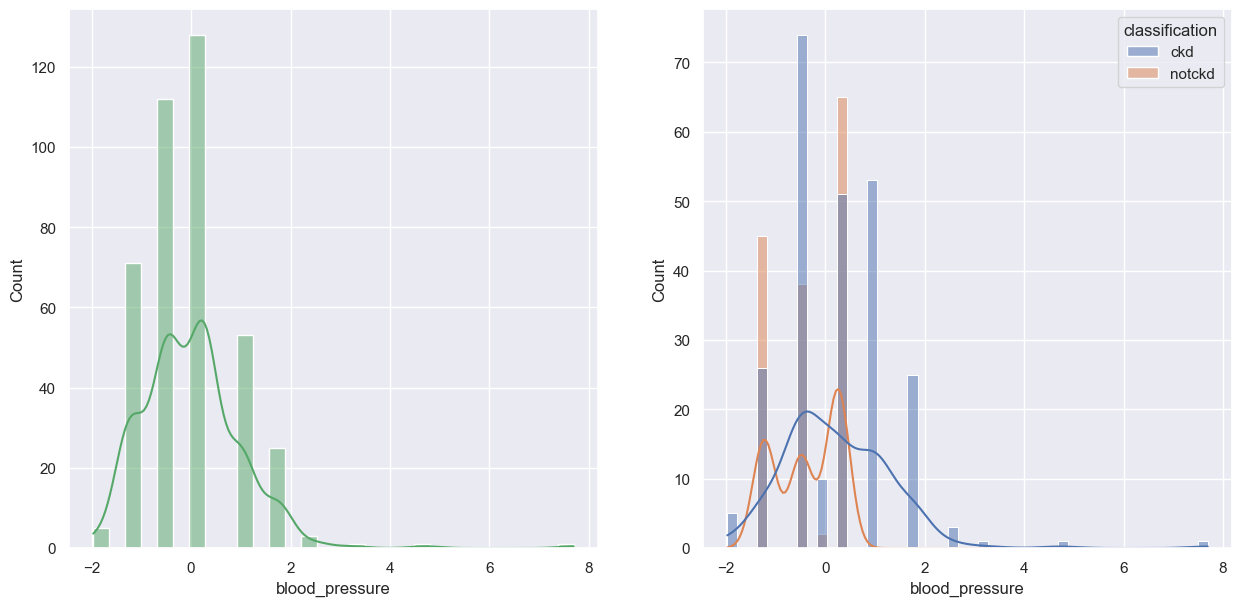

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='blood_pressure',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='blood_pressure',kde=True,hue='classification')
plt.show()

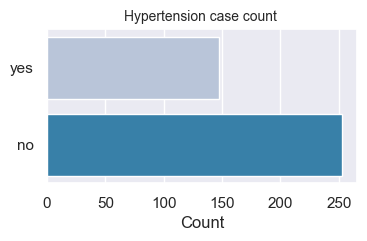

In [52]:
plt.rcParams['figure.figsize'] = (4, 2)
#plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['hypertension'], palette = 'PuBu')
plt.title('Hypertension case count ', fontweight = 15, fontsize = 10)
plt.xlabel('Count')
plt.ylabel('')
plt.show()

<Axes: xlabel='classification', ylabel='age'>

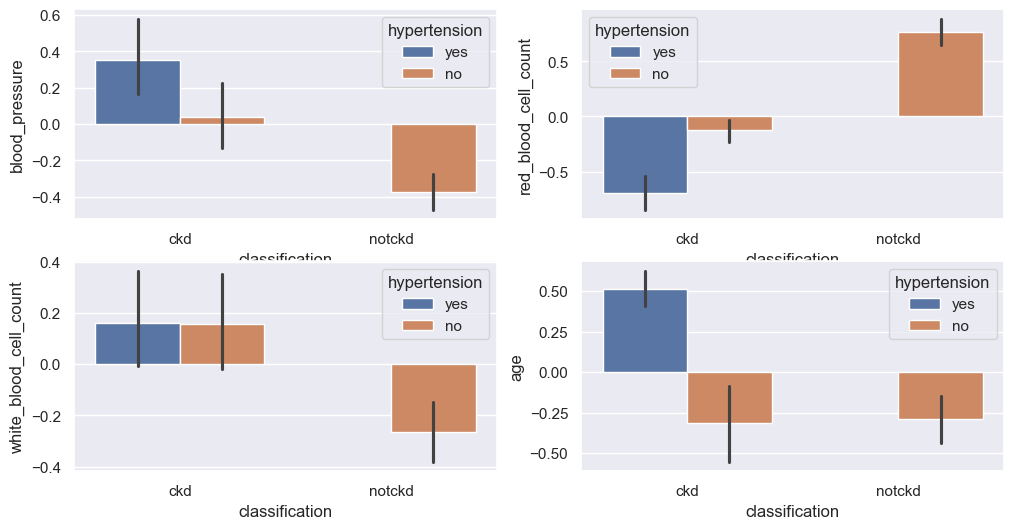

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['classification'], y=df['blood_pressure'], hue=df['hypertension'])
plt.subplot(2,2,2)
sns.barplot (x=df['classification'], y=df['red_blood_cell_count'], hue=df['hypertension'])
plt.subplot(2,2,3)
sns.barplot (x=df['classification'], y=df['white_blood_cell_count'], hue=df['hypertension'])
plt.subplot(2,2,4)
sns.barplot (x=df['classification'], y=df['age'], hue=df['hypertension'])

Insights:
- Hypertension contribute to chronic kidney disease
- White blood cell count has no impact on kidney condition

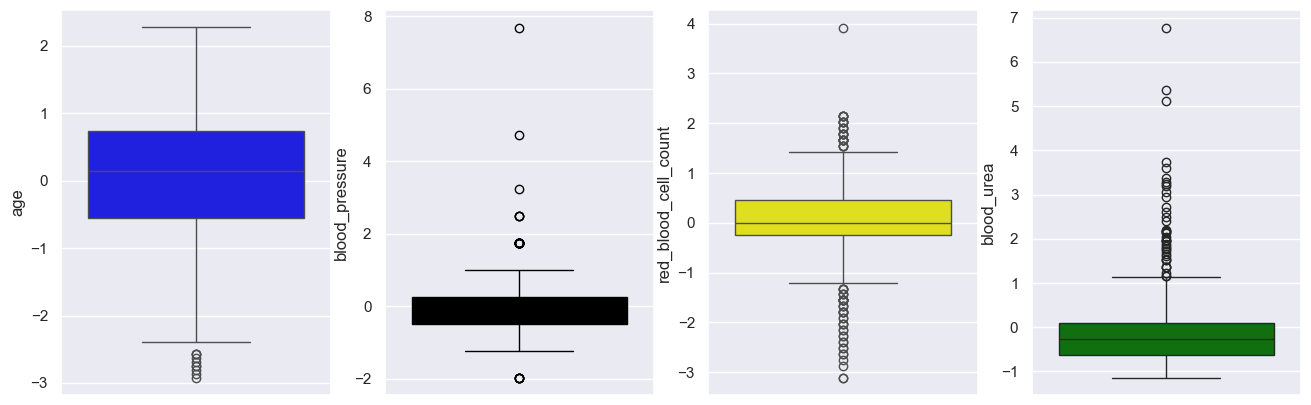

In [60]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['age'],color='blue')
plt.subplot(142)
sns.boxplot(df['blood_pressure'],color='black')
plt.subplot(143)
sns.boxplot(df['red_blood_cell_count'],color='yellow')
plt.subplot(144)
sns.boxplot(df['blood_urea'],color='green')
plt.show()